**好壞質檢分類實戰task：**
1. 基於data_class_raw.csv數據，根據高斯分佈概率密度函數，尋找異常點並剔除
2. 基於data_class_processed.csv數據，進行PCA處理，確定重要數據維度及成分
3. 完成數據分離，數據分離參數：random_state=4,test_size=0.4
4. 建立KNN模型完成分類，n_beighbors取10，計算分類準確率，可視化分類邊界
5. 計算測試數據集對應的混淆矩陣，計算準確率、召回率、特異度、精確率、F1分數
6. 嘗試不同的n_neighbors(1-20)，計算其在訓練數據集、測試數據集上的準確率並作圖

In [1]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data_class_raw.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [2]:
#define X and y
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']

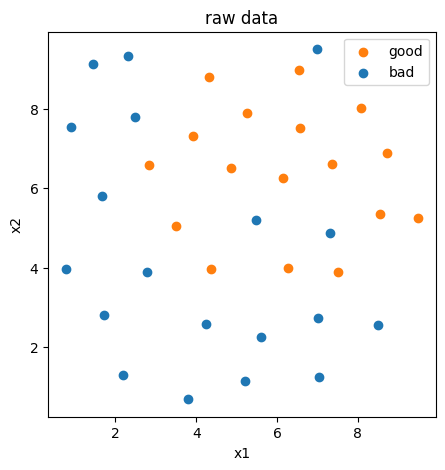

In [3]:
#visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
bad = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
good = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.legend((good,bad),('good','bad'))
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
#anomy detection
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(X[y==0])
y_predict_bad = ad_model.predict(X[y==0])
print(y_predict_bad)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]


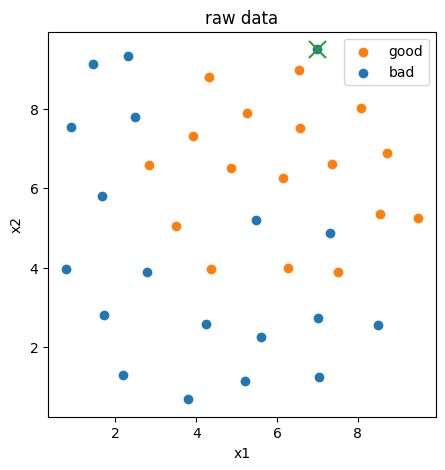

In [5]:
fig2 = plt.figure(figsize=(5,5))
bad = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
good = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.scatter(X.loc[:,'x1'][y==0][y_predict_bad==-1],X.loc[:,'x2'][y==0][y_predict_bad==-1],marker='x',s=150)
plt.legend((good,bad),('good','bad'))
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
data = pd.read_csv('data_class_processed.csv')
data.head()
#define X and y
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']

[0.5369408 0.4630592]


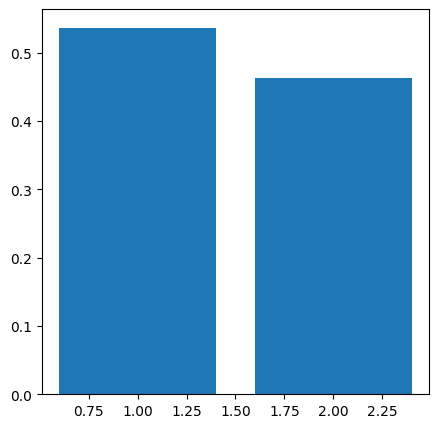

In [7]:
#pca
from sklearn.preprocessing import StandardScaler  #標準化處理
from sklearn.decomposition import PCA
X_norm = StandardScaler().fit_transform(X) #標準化處理
pca = PCA(n_components=2) #二維
X_reduced = pca.fit_transform(X_norm)
var_ratio = pca.explained_variance_ratio_ #標準差比例
print(var_ratio)
fig3 = plt.figure(figsize=(5,5))
plt.bar([1,2],var_ratio)
plt.show()

In [8]:
# train and test split: random_state=4,test_size=0.4
from sklearn.model_selection import train_test_split #數據分離
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4,test_size=0.4)
print(X_train.shape,X_test.shape,X.shape) #看一下訓練數據、測試數據占原始數據的多少

(21, 2) (14, 2) (35, 2)


In [9]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train,y_train)
y_train_predict = knn_10.predict(X_train)
y_test_predict = knn_10.predict(X_test)

#calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
accuracy_test = accuracy_score(y_test,y_test_predict)
print("training accuracy:",accuracy_train)
print("testing accuracy:",accuracy_test)

training accuracy: 0.9047619047619048
testing accuracy: 0.6428571428571429


In [10]:
#visualize the knn result and boundary
xx, yy = np.meshgrid(np.arange(0,10,0.05),np.arange(0,10,0.05)) #生成0-10間隔0.05的數據
print(xx)
print(xx.shape)

[[0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 ...
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]]
(200, 200)


In [11]:
x_range = np.c_[xx.ravel(),yy.ravel()]
print(x_range.shape)

(40000, 2)


In [12]:
y_range_predict = knn_10.predict(x_range)

E:\python\anaconda3\envs\test\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


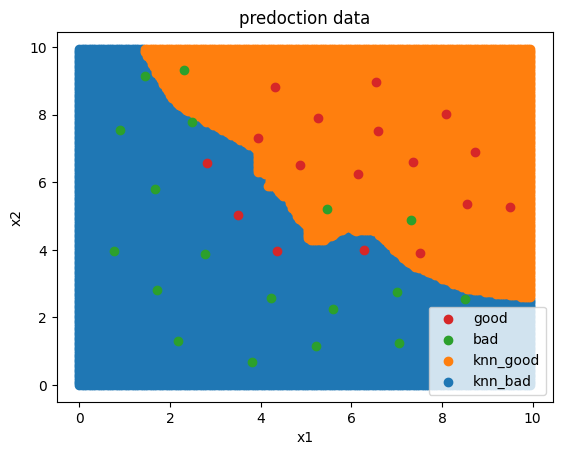

In [13]:
fig4 = plt.figure()
knn_bad = plt.scatter(x_range[:,0][y_range_predict==0],x_range[:,1][y_range_predict==0])
knn_good = plt.scatter(x_range[:,0][y_range_predict==1],x_range[:,1][y_range_predict==1])

bad = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
good = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.legend((good,bad,knn_good,knn_bad),('good','bad','knn_good','knn_bad'))
plt.title('predoction data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_predict) #混淆矩陣
print(cm)

[[4 2]
 [3 5]]


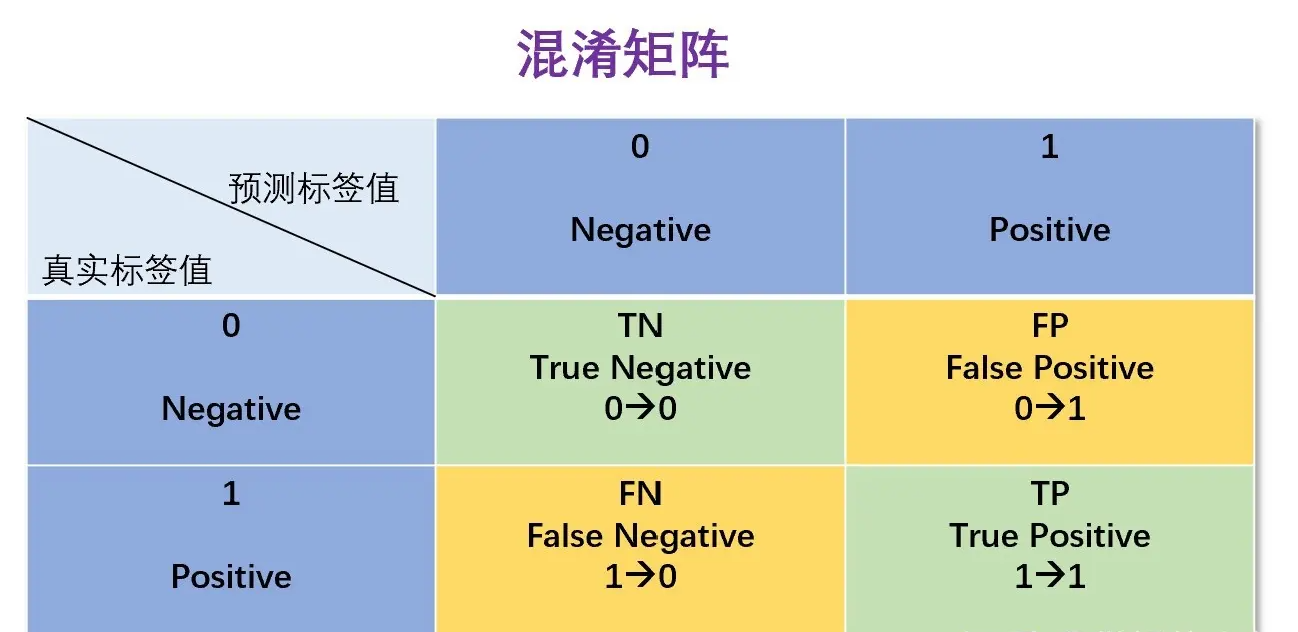

In [15]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
print(TN,FP,FN,TP)

4 2 3 5


**準確率：** 整體樣本中，預測正確樣本數的比例
- Accuracy = (TP + TN)/(TP + TN + FP + FN)

In [16]:
accuaracy = (TP + TN)/(TP + TN + FP + FN)
print(accuaracy)

0.6428571428571429


**靈敏度(召回率):** 正樣本中，預測正確的比例
- Sensitivity = Recall = TP/(TP + FN)

In [17]:
recall = TP/(TP + FN)
print(recall)

0.625


**特異度:** 負樣本中，預測正確的比例
- Specificity = TN/(TN + FP)

In [18]:
specificity = TN/(TN + FP)
print(specificity)

0.6666666666666666


**精確率:** 預測結果為正的樣本中，預測正確的比例
- Precision = TP/(TP + FP)

In [19]:
precision = TP/(TP + FP)
print(precision)

0.7142857142857143


**F1分數:** 綜合Precision和Recall的一個判斷指標
- F1 Score = 2 * Precision * Recall / (Precision + Recall)

In [20]:
f1 = 2 * precision * recall / (precision + recall)
print(f1)

0.6666666666666666


In [21]:
#try different k and calcualte the accuracy for each
n = [i for i in range(1,21)]
accuaracy_train = []
accuaracy_test = []
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    accuaracy_train_i = accuracy_score(y_train,y_train_predict)
    accuaracy_test_i = accuracy_score(y_test,y_test_predict)
    accuaracy_train.append(accuaracy_train_i)
    accuaracy_test.append(accuaracy_test_i)
print(accuaracy_train,accuaracy_test)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714] [0.5714285714285714, 0.5, 0.5, 0.5714285714285714, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


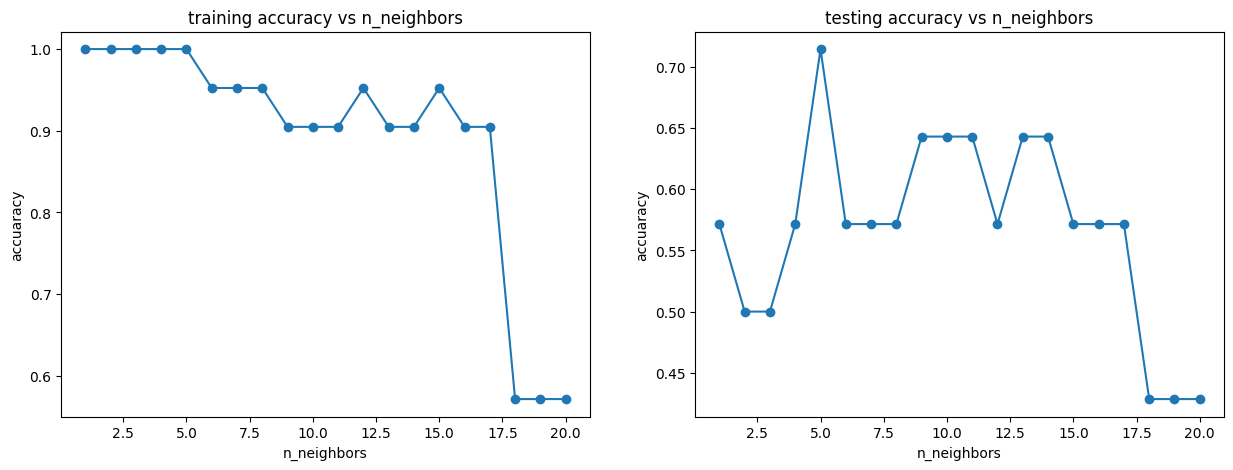

In [22]:
fig5 = plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(n,accuaracy_train,marker='o')
plt.title('training accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuaracy')
plt.subplot(122)
plt.plot(n,accuaracy_test,marker='o')
plt.title('testing accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuaracy')

plt.show()

**好壞質檢分類實戰summary:**
1. 通過進行異常監測，幫助找到了潛在的異常數據點
1. 通過PCA分析，發現需要保留2維數據集
1. 實現了訓練數據與測試數據的分離，並計算模型對於測試數據的預測準確率
1. 計算得到混淆矩陣，實現模型更全面的評估
1. 通過新的方法，可視化分類的決策邊界
1. 通過調整核心參數n_neighbors值(K值)，在計算對應的準確率，可以幫助我們更好的確定使用哪個模型
1. 核心算法参考链接: 
- https://scikit-learn.org.cn/view/695.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
                 